In [1]:
%pylab inline
import numpy as np
import json

import math
import gzip, pickle
import matplotlib.pyplot as plt

from code.mlp import MLP
from code.mlp_batch import MLPBatch

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gzip,pickle
f=gzip.open('mnist.pkl.gz')
data=pickle.load(f, encoding='latin')

"""data[0][0]: matrice de train data
data[0][1]: vecteur des train labels

data[1][0]: matrice de valid data
data[1][0]: vecteur des valid labels

data[2][0]: matrice de test data
data[2][0]: vecteur des test labels"""

train = np.matrix(data[0][0])
valid = np.matrix(data[1][0])
test = np.matrix(data[2][0])
train_target = np.matrix(data[0][1]).getA1()
valid_target = np.matrix(data[1][1]).getA1()
test_target = np.matrix(data[2][1]).getA1()

## Question 8

In [3]:
dh = train.shape[1]
d = train.shape[1]
m = 10
k = 100
epsilon = 1e-5

lamdas = np.matrix([[0.0001, 0.00001],[0.0001, 0.000006]])
learning_rate = 0.0019

iterations = 500

nnet = MLP(d, m, dh, epsilon, show_epoch=True)
nnet.train(train, train_target, lamdas, learning_rate , k, iterations=iterations)

nnet_batch = MLPBatch(d, m, dh, epsilon, show_epoch=True)
nnet_batch.train(train, train_target, lamdas, learning_rate , k, iterations=iterations)

1 epoch time: ~418.83867399999997 s
1 epoch time: ~154.24682200000007 s


## Question 9

In [4]:
dh = train.shape[1]
d = train.shape[1]
m = 10
k = 100
epsilon = 1e-5

lamdas = np.matrix([[0.0001, 0.00001],[0.0001, 0.000006]])
learning_rate = 0.0019

iterations = 500

nnet_batch_9 = MLPBatch(d, m, dh, epsilon, show_epoch=True, save_datapoints=True)
nnet_batch_9.train(train, train_target, lamdas, learning_rate , k, iterations=iterations, valid=valid, valid_target=valid_target, test=test, test_target=test_target)

1 epoch time: ~152.569295 s


## Question 10

In [5]:
dh = train.shape[1]
d = train.shape[1]
m = 10
k = 100
epsilon = 1e-5

lamdas = np.matrix([[0.0001, 0.00001],[0.0001, 0.000006]])
learning_rate = 0.0019

iterations = 7500

nnet_batch_10 = MLPBatch(d, m, dh, epsilon, show_epoch=True, save_datapoints=True)
nnet_batch_10.train(train, train_target, lamdas, learning_rate , k, iterations=iterations, valid=valid, valid_target=valid_target, test=test, test_target=test_target)

1 epoch time: ~149.6033440000001 s
1 epoch time: ~309.95422500000006 s
1 epoch time: ~475.40998 s
1 epoch time: ~641.9719840000001 s
1 epoch time: ~806.026459 s
1 epoch time: ~971.7885580000001 s
1 epoch time: ~1138.2775430000002 s
1 epoch time: ~1303.577249 s
1 epoch time: ~1473.383362 s
1 epoch time: ~1643.0719350000004 s
1 epoch time: ~1804.9996960000003 s
1 epoch time: ~1972.1935690000005 s
1 epoch time: ~2138.8523450000002 s
1 epoch time: ~2303.9774270000003 s
1 epoch time: ~2465.1166040000003 s


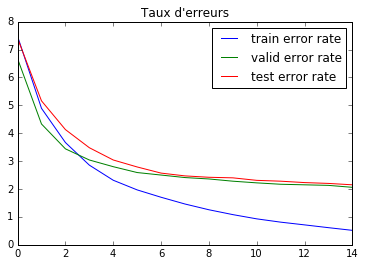

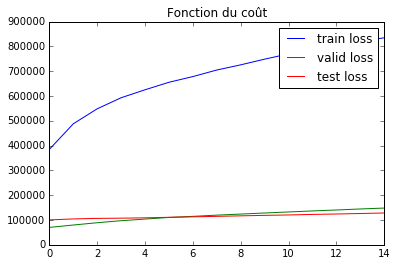

In [6]:
with open('datapoints.json') as data_file:    
    data = json.load(data_file)
    
    train_errors = data['train_error']
    train_losses = data['train_loss']
    
    valid_errors = data['valid_error']
    valid_losses = data['valid_loss']
    
    test_errors = data['test_error']
    test_losses = data['test_loss']
    
    plt.plot(train_errors, label='train error rate')
    plt.plot(valid_errors, label='valid error rate')
    plt.plot(test_errors, label='test error rate')
    plt.legend()
    plt.title('Taux d\'erreurs')
    plt.show()
    
    plt.plot(train_losses, label='train loss')
    plt.plot(valid_losses, label='valid loss')
    plt.plot(test_losses, label='test loss')
    plt.legend()
    plt.title('Fonction du coût')
    plt.show()
    